<a href="https://colab.research.google.com/github/HR0262/PCMCI-in-commuter-trian/blob/main/PCMCI-stop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tigramite
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.6/309.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.6 MB/s eta 0:00:00


In [2]:
# Imports
import numpy as np
## use `%matplotlib notebook` for interactive figures
# plt.style.use('ggplot')
import pandas as pd
import pickle
import networkx as nx

In [3]:
import tigramite
from tigramite import data_processing as pp
from tigramite.toymodels import structural_causal_processes as toys

from tigramite.pcmci import PCMCI
from tigramite.lpcmci import LPCMCI
from tigramite.jpcmciplus import JPCMCIplus

from tigramite.independence_tests.parcorr import ParCorr
from tigramite.independence_tests.robust_parcorr import RobustParCorr
from tigramite.independence_tests.parcorr_wls import ParCorrWLS
from tigramite.independence_tests.gpdc import GPDC

from tigramite.plotting import plot_time_series_graph
from tigramite.plotting import plot_graph

In [7]:
df = pd.read_csv(r"/content/0502_delaymax_180_300600.csv", index_col=0)
#df.drop(columns=['Unnamed: 0'], inplace=True)
df.index.name = None
display(df)

Arlanda central  Barkarby    Bro  Bålsta  Farsta strand  Flemingsberg  \
300.0              0.0       0.0    0.0     0.0            0.0           0.0   
310.0              0.0       0.0    0.0     0.0            0.0           0.0   
320.0              0.0       0.0    0.0     0.0            0.0           0.0   
330.0              0.0       0.0    0.0     0.0            0.0           0.0   
340.0              0.0       0.0    0.0     0.0            0.0           0.0   
350.0              0.0       0.0    0.0     0.0            0.0           0.0   
360.0              0.0     238.0    0.0     0.0            0.0           0.0   
370.0              0.0       0.0    0.0     0.0            0.0           0.0   
380.0              0.0       0.0    0.0     0.0            0.0           0.0   
390.0              0.0       0.0    0.0     0.0            0.0           0.0   
400.0              0.0       0.0    0.0     0.0            0.0           0.0   
410.0              0.0       0.0    0.0     0.0            0.0           0.0   
420.0              0.0       0.0    0.0     0.0            0.0           0.0   
430.0              0.0       0.0    0.0     0.0            0.0        1066.0   
440.0              0.0       0.0    0.0     0.0            0.0           0.0   
450.0              0.0       0.0    0.0     0.0            0.0           0.0   
460.0              0.0       0.0    0.0     0.0            0.0         646.0   
470.0              0.0     258.0    0.0     0.0            0.0         378.0   
480.0              0.0     364.0    0.0     0.0            0.0           0.0   
490.0              0.0       0.0    0.0     0.0            0.0           0.0   
500.0            464.0       0.0    0.0     0.0            0.0           0.0   
510.0              0.0       0.0    0.0     0.0            0.0           0.0   
520.0              0.0     988.0    0.0     0.0            0.0           0.0   
530.0            649.0     434.0    0.0     0.0          267.0           0.0   
540.0              0.0       0.0  415.0     0.0            0.0           0.0   
550.0              0.0       0.0    0.0   402.0            0.0           0.0   
560.0            742.0       0.0    0.0     0.0            0.0           0.0   
570.0              0.0       0.0    0.0     0.0            0.0           0.0   
580.0              0.0       0.0    0.0     0.0            0.0           0.0   
590.0              0.0       0.0    0.0     0.0            0.0           0.0   
600.0              0.0       0.0    0.0     0.0            0.0           0.0   

       Gnesta  Gröndalsviken  Handen  Helenelund  ...  Tungelsta  Ulriksdal  \
300.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
310.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
320.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
330.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
340.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
350.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
360.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
370.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
380.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
390.0     0.0            0.0     0.0         0.0  ...      193.0        0.0   
400.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
410.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
420.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
430.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
440.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
450.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
460.0     0.0            0.0     0.0         0.0  ...        0.0        0.0   
470.0     0.0           

In [8]:
df_delay = df

# PCMCI 用车站作为列，车次作为行 分析

分析车站之间的因果关系

In [13]:
dataframe = pp.DataFrame(data = df_delay.values, var_names = df_delay.columns)

In [14]:
parcorr = ParCorr(significance='analytic')
robust_parcorr=RobustParCorr(significance='analytic')
gpdc = GPDC()

# 早高峰
# 筛选前后
cond_ind_test=gpdc #非线性关系
pcmci = PCMCI(
    dataframe=dataframe,
    cond_ind_test=cond_ind_test,
    verbosity=1)
tau_max = 1 #评价影响几个车次，1-10个数多少
pc_alpha = 0.05
pcmci.verbosity = 1

# results = pcmci.run_pcmciplus(tau_min=0, tau_max=tau_max, pc_alpha=pc_alpha)
results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None,alpha_level=0.05)


##
## Step 1: PC1 algorithm for selecting lagged conditions
##

Parameters:
independence test = gp_dc
tau_min = 1
tau_max = 1
pc_alpha = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
max_conds_dim = None
max_combinations = 1




流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.


## Resulting lagged parent (super)sets:

    Variable Arlanda central has 4 link(s):
    [pc_alpha = 0.05]
        (Bålsta -1): max_pval = 0.00000, |min_val| =  0.699
        (Rotebro -1): max_pval = 0.02400, |min_val| =  0.492
        (Uppsala C -1): max_pval = 0.03200, |min_val| =  0.468
        (Norrviken -1): max_pval = 0.04200, |min_val| =  0.432

    Variable Barkarby has 2 link(s):
    [pc_alpha = 0.05]
        (Sundbyberg -1): max_pval = 0.00000, |min_val| =  0.904
        (Solna -1): max_pval = 0.00800, |min_val| =  0.532

    Variable Bro has 1 link(s):
    [pc_alpha = 0.05]
        (Farsta strand -1): max_pval = 0.00000, |min_val| =  1.000

    Variable Bålsta has 2 link(s):
    [pc_alpha = 0.05]
        (Bro -1): max_pval = 0.00000, |min_val| =  1.000
        (Knivsta -1): max_pval = 0.04400, |min_val| =  0.426

    Variable Farsta strand has 3 link(s):
    [pc_alpha = 0.05]
        (Jakobsberg -1): max_pval = 0.00000, |min_val| =  0.628
        (Barkarby -1): max_pval = 0

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.


## Significant links at alpha = 0.05:

    Variable Arlanda central has 75 link(s):
        (Bålsta  0): pval = 0.00000 | val =  0.830 | unoriented link
        (Krigslida  0): pval = 0.00000 | val =  0.770 | unoriented link
        (Tungelsta  0): pval = 0.00000 | val =  0.770 | unoriented link
        (Västerhaninge  0): pval = 0.00000 | val =  0.770 | unoriented link
        (Knivsta  0): pval = 0.00000 | val =  0.745 | unoriented link
        (Krigslida -1): pval = 0.00000 | val =  0.716
        (Tungelsta -1): pval = 0.00000 | val =  0.716
        (Västerhaninge -1): pval = 0.00000 | val =  0.716
        (Hemfosa -1): pval = 0.00000 | val =  0.715
        (Segersäng -1): pval = 0.00000 | val =  0.715
        (Kallhäll -1): pval = 0.00000 | val =  0.705
        (Hemfosa  0): pval = 0.00000 | val =  0.699 | unoriented link
        (Segersäng  0): pval = 0.00000 | val =  0.699 | unoriented link
        (Uppsala C -1): pval = 0.00000 | val =  0.668
        (Södertälje centrum -1): pv

/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


p_matrix[i, j, tau]	vs val_matrix[i, j, tau]

统计检验的 p 值（显著性），条件独立性检验的 统计量（强度），❌ 越小越显著，< 0.05 常用于筛选， 用来判断是否显著、有因果边

val_matrix[i, j, tau]，条件独立性检验的 统计量（强度），✅ 越大（或绝对值大）说明依赖更强，用来排序因果边强弱

用法p < 0.05 筛选显著因果边。用 p_matrix 做初步筛选，再用 val_matrix 判断因果强度。

# 可视化部分

边上的数字是前n个站点的延误对当前站点的因果影响

节点颜色的深浅代表auto-MCI values，表明了过去车次对站点的因果影响

边的颜色深浅代表cross-MCI values，表明了其他站点对该站点的因果影响

(<Figure size 1200x600 with 1 Axes>, <Axes: >)

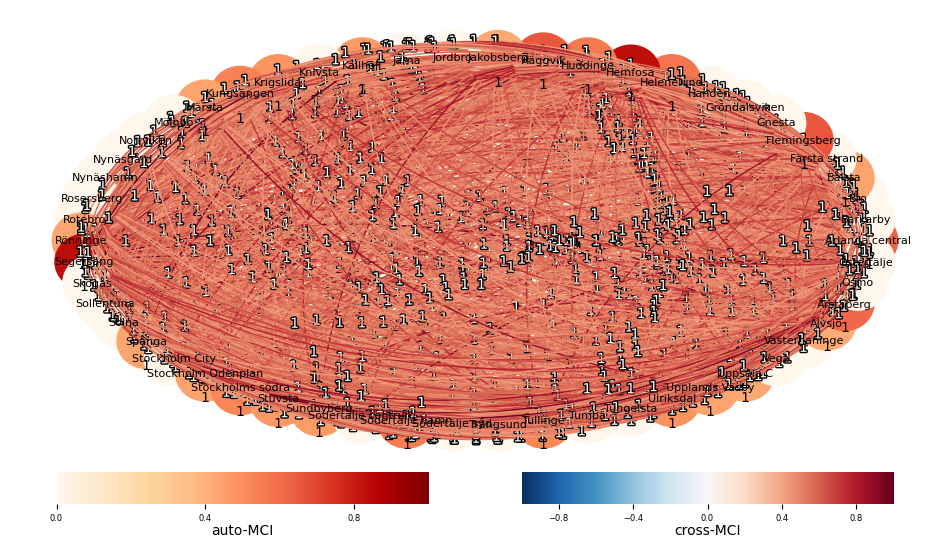

In [15]:
# 需要跟前面节点进行筛选配合，筛选p_matrix，val_matrix

# 设置显著性水平
alpha_level = 0.05

# 从 p_matrix 生成布尔型因果图
graph = pcmci.get_graph_from_pmatrix(
    p_matrix=results['p_matrix'],
    alpha_level=alpha_level,
    tau_min=0,
    tau_max=tau_max
)
# 绘图
plot_graph(
    graph=graph,
    val_matrix=results['val_matrix'],             # 测试统计值，通常是偏相关或其他统计量
    var_names=dataframe.var_names,                # 变量名称（你自己的时间序列名称）
    link_colorbar_label='cross-MCI',                # 显示边的颜色表示的含义（例如：偏相关系数）
    figsize=(12, 18),                              # 图像大小
    alpha=1.0,                                    # 图形的透明度
    arrow_linewidth=1.0,                          # 箭头的线宽
    node_size=0.3,                                # 节点大小
    curved_radius=0.2,                            # 边的弯曲度
    label_fontsize=10,                            # 标签字体大小
    node_label_size=8,                           # 节点标签字体大小
    cmap_edges='RdBu_r',                          # 边的颜色映射（红蓝渐变）
    cmap_nodes='OrRd',                            # 节点的颜色映射
    show_colorbar=True,                           # 显示颜色条
    show_autodependency_lags=True,                # 显示自依赖延迟
    vmin_edges=-1,                                # 边的颜色条范围
    vmax_edges=1.0,                               # 边的颜色条范围
    vmin_nodes=0,                                 # 节点颜色条范围
    vmax_nodes=1.0                                # 节点颜色条范围
)

# 数多少tau

定义函数

## 函数

In [26]:
def counttau(tau_input, dataframe):

    gpdc = GPDC()
    pcmci = PCMCI(
        dataframe=dataframe,
        cond_ind_test=gpdc,
        verbosity=0
    )

    tau_max = tau_input
    results = pcmci.run_pcmci(tau_min=0, tau_max=tau_max, pc_alpha=None, alpha_level=0.05)

    p_matrix = results['p_matrix']
    val_matrix = results['val_matrix']
    num_vars = p_matrix.shape[0]
    tau_max_plus1 = p_matrix.shape[2]

    def compute_counts_strengths(alpha):
        count = [0] * tau_max_plus1
        strength_sum = [0.0] * tau_max_plus1
        strength_count = [0] * tau_max_plus1

        for i in range(num_vars):
            for j in range(num_vars):
                for tau in range(tau_max_plus1):
                    pval = p_matrix[i, j, tau]
                    val = val_matrix[i, j, tau]
                    if pval <= alpha:
                        count[tau] += 1
                        strength_sum[tau] += abs(val)
                        strength_count[tau] += 1

        strength_avg = [
            strength_sum[i] / strength_count[i] if strength_count[i] > 0 else 0.0
            for i in range(tau_max_plus1)
        ]

        return count, strength_avg

    count_005, strength_005 = compute_counts_strengths(alpha=0.05)
    count_001, strength_001 = compute_counts_strengths(alpha=0.01)

    return {
        'alpha_0.05': {
            'count_per_tau': count_005,
            'strength_per_tau': strength_005
        },
        'alpha_0.01': {
            'count_per_tau': count_001,
            'strength_per_tau': strength_001
        }
    }

## 折叠

In [27]:
count1=counttau(1,dataframe)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.

In [29]:
count1=counttau(1,dataframe)
count2=counttau(2,dataframe)
count3=counttau(3,dataframe)
count4=counttau(4,dataframe)
count5=counttau(5,dataframe)

流式输出内容被截断，只能显示最后 5000 行内容。
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.py:442: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/gaussian_process/kernels.

## 输出结果

In [30]:
print(count1)
print(count2)
print(count3)
print(count4)
print(count5)

{'alpha_0.05': {'count_per_tau': [1252, 1274], 'strength_per_tau': [np.float64(0.5464088173388458), np.float64(0.5505436205980365)]}, 'alpha_0.01': {'count_per_tau': [666, 695], 'strength_per_tau': [np.float64(0.6165917982412725), np.float64(0.6209699648537219)]}}
{'alpha_0.05': {'count_per_tau': [978, 981, 943], 'strength_per_tau': [np.float64(0.5616185586715355), np.float64(0.5602950607828953), np.float64(0.5523856225483703)]}, 'alpha_0.01': {'count_per_tau': [542, 547, 498], 'strength_per_tau': [np.float64(0.626747978793524), np.float64(0.6235414379021412), np.float64(0.6143857437656829)]}}
{'alpha_0.05': {'count_per_tau': [1126, 1131, 1074, 1019], 'strength_per_tau': [np.float64(0.5628688089849128), np.float64(0.5663241586851097), np.float64(0.5566832413975579), np.float64(0.5574511891913471)]}, 'alpha_0.01': {'count_per_tau': [470, 477, 452, 428], 'strength_per_tau': [np.float64(0.654141615576576), np.float64(0.659824863945562), np.float64(0.6417371179619659), np.float64(0.6417501